# Tarea 1

En esta tarea resolverán varios problemas relacionados con los algoritmos de Monte-Carlo. Por favor, tengan en cuenta que la tarea será bastante larga. Esta es sólo la primera parte de 3 partes. 

Parece que son 


## Integrales de Monte-Carlo

Esta sección son problemas "fáciles", pero tardados. Tendrás que correr simulaciones por varios minutos. Como son problemas fáciles, valen entre los 5 problemas, 1 punto de la tarea. 

[1] Haz una función general del método de disparo de Monte-Carlo para integración. La función debe tener como argumentos la función de $n$ variables que se integrará; una región definida por $2n$ valores que corresponden a los valores iniciales y finales de cada lado de un prisma rectangular sobre el cual se integrará la función; el valor máximo y el mínimo de la función en la región de integración; y el número de tiros que se harán para estimar la integración. 

Prueba tu función con unas 3 o 4 integrales que puedas comprobar!

In [2]:
function montyPython(f, nPrism, n=10000)
    summ = 0
    vol = 0
    deltota = 0
    inits = []
    delta = 0
    
    for inter in nPrism
        delta = inter[2] - inter[1]
        append!(inits, inter[1])
        
        if vol == 0
            vol = delta
        else
            vol *= delta
        end
        
    end
    
    if deltota < delta
        deltota = delta
    end

    for k in 1:n
        summ += f([j*deltota for j in rand(length(nPrism))] + inits)
    end
    
    return vol*(summ/n)
end

montyPython (generic function with 2 methods)

In [3]:
f(A) = A[1] #función identidad

f (generic function with 1 method)

In [4]:
montyPython(f, [(1, 2)])

1.5026994754732192

In [5]:
g(A) = sum(A.*A)

g (generic function with 1 method)

In [6]:
montyPython(g, [[0, 1], [0, 1], [0, 1]])

0.9964603345593174

In [7]:
h(A) = sum(sin.(A))

h (generic function with 1 method)

In [8]:
montyPython(h, [(-pi, pi), (-pi, pi)], 10000000)

InterruptException: InterruptException:

[2] En este ejercicio necesitarás usar la paquetería StatsBase y LsqFit. Revisa su documentación. Utiliza la función anterior para obtener un histograma (con al menos $10^4$ muestras) normalizado (para esto usa StatBase) y ajustale una gaussiana. Repite esto para diferentes números de tiros. Finalmente haz una gráfica de la desviación estandar de la gaussiana como función del número de tiros.  

In [9]:
using StatsBase

In [ ]:
obs = [montyPython(f, [[0, 1]], 5) for k in 1:10000]

In [ ]:
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
m(x, p) = 1/(p[1]*sqrt(2*pi)) * exp.(-.5 *((-p[2] .+ x) ./p[1]).^2 )
p0 = [.4, 0.6]
curve_fit(m, collect(0.0:0.1:1.0), [3, 77, 504, 1624, 2742, 2784, 1645, 544, 75, 2, 0], p0)

$$\mu = .5$$
$$\sigma = 0.025$$

In [ ]:
obs = [montyPython(f, [[0, 1]], 100) for k in 1:10000]

In [ ]:
fit(Histogram, obs)

In [ ]:
using Plots

In [ ]:
histogram(obs)

In [ ]:
m(x, p) = 1/(p[1]*sqrt(2*pi)) * exp.(-.5 *((-p[2] .+ x) ./p[1]).^2 )
using LsqFit

In [ ]:
p0 = [.05, 0.55]
curve_fit(m, collect(0.38:0.02:0.64),  [2, 39, 141, 612, 1646, 2590, 2495, 1689, 591, 168, 24, 2, 1, 0], p0)

$$\mu = 0.478$$
$$\sigma = 0.0048$$

In [ ]:
obs1 = [montyPython(f, [[0, 1]], 10000) for k in 1:10000]

In [ ]:
fit(Histogram, obs1)

In [ ]:
m(x, p) = 1/(p[1]*sqrt(2*pi)) * exp.(-.5 *((-p[2] .+ x) ./p[1]).^2 )
p0 = [.01, 0.499]
curve_fit(m, collect(0.488:0.002:0.512), [2, 33, 150, 647, 1554, 2530, 2587, 1627, 679, 164, 26, 1, 0], p0)

$$\mu = 0.4991$$
$$\sigma = 0.00107$$

In [ ]:
histogram(obs1)

In [ ]:
scatter([5,  100, 10000], [0.025, 0.0048, 0.00107])

[3] Repite el ejercicio anterior para funciones de dimensión $1$, $2$, $3$ y $4$. Con los resultados, mide (usando @elapse) el tiempo de cómputo que lleva producir una aproximación a una integral como función de la desviación estandar (que es el equivalente al error en el método de Monte-Carlo) para las funciones de $1$, $2$, $3$ y $4$ dimensiones. Compara con el tiempo que lleva hacer una suma de Riemman para los mismos casos, esta vez como función de la separación entre puntos de integración $\Delta x$. ¿En qué dimensión se vuelve mejor el método de disparo?

In [ ]:
g(A) = sum(A)

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1]], 5) for k in 1:10000]

In [ ]:
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
m(x, p) = 1/(p[1]*sqrt(2*pi)) * exp.(-.5 *((-p[2] .+ x) ./p[1]).^2 )
p0 = [.2, 0.6]
curve_fit(m, collect(0.3:0.1:1.5999999999999999), [3, 22, 98, 333, 922, 1563, 2083, 2031, 1568, 880, 365, 111, 21], p0)

$$f:\mathbb{R}^2 \rightarrow \mathbb{R}$$
$$\mu = .9999$$
$$\sigma = 0.025$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1]], 100) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
m(x, p) = 1/(p[1]*sqrt(2*pi)) * exp.(-.5 *((-p[2] .+ x) ./p[1]).^2 )
p0 = [.2, 0.6]
curve_fit(m, collect(0.84:0.02:1.18), [1, 14, 61, 183, 469, 910, 1483, 1873, 1841, 1458, 990, 476, 179, 48, 10, 1, 3, 0], p0)

$$f:\mathbb{R}^2 \rightarrow \mathbb{R}$$
$$\mu = .9799$$
$$\sigma = 0.00215$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1]], 10000) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
p0 = [.2, 0.6]
curve_fit(m, collect(0.984:0.002:1.016), [2, 18, 70, 175, 432, 871, 1485, 1874, 1867, 1505, 968, 471, 191, 51, 18, 2, 0], p0)

$$f:\mathbb{R}^2 \rightarrow \mathbb{R}$$
$$\mu = .9989$$
$$\sigma = 0.0011$$

In [ ]:
scatter([5 100 10000], [0.025 0.00215 0.0011])

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1]], 5) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.2, 0.6]
curve_fit(m, collect(0.6:0.2:2.4), [7, 107, 792, 2388, 3409, 2402, 768, 119, 8, 0], p0)

$$f:\mathbb{R}^3 \rightarrow \mathbb{R}$$
$$\mu = 1.4$$
$$\sigma = 0.0261$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1]], 100) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.2, 0.6]
curve_fit(m, collect(1.3:0.05:1.7), [10, 197, 1357, 3409, 3442, 1357, 216, 12, 0], p0)

$$f:\mathbb{R}^3 \rightarrow \mathbb{R}$$
$$\mu = 1.4999$$
$$\sigma = 0.00420$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1]], 10000) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.15, 1.7]
curve_fit(m, collect(1.48:0.005:1.52), [14, 192, 1334, 3452, 3407, 1361, 225, 15, 0], p0)

$$f:\mathbb{R}^3 \rightarrow \mathbb{R}$$
$$\mu = 1.500000007$$
$$\sigma = 0.00106$$

In [ ]:
scatter([5 100 10000], [0.0261 0.0042 0.00106])

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 5) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.3, 2.05]
curve_fit(m, collect(1.0:0.2:3.2), [5, 81, 512, 1587, 2826, 2813, 1595, 489, 82, 8, 2, 0], p0)

$$f:\mathbb{R}^4 \rightarrow \mathbb{R}$$
$$\mu = 1.898$$
$$\sigma = 0.106$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 100) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.1, 2.05]
curve_fit(m, collect(1.8:0.05:2.25), [49, 364, 1502, 3094, 3074, 1498, 358, 59, 2, 0], p0)

$$f:\mathbb{R}^4 \rightarrow \mathbb{R}$$
$$\mu = 1.9709$$
$$\sigma = 0.0258$$

In [ ]:
obs = [montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 10000) for k in 1:10000]
fit(Histogram, obs)

In [ ]:
histogram(obs)

In [ ]:
p0 = [.075, 2]
curve_fit(m, collect(1.975:0.005:2.02), [1, 46, 369, 1531, 3004, 3123, 1509, 373, 44, 0], p0)

$$f:\mathbb{R}^4 \rightarrow \mathbb{R}$$
$$\mu = 1.999$$
$$\sigma = 0.001244$$

In [ ]:
scatter([5 100 10000], [0.106 0.0258 0.00124])

In [ ]:
@elapsed montyPython(g, [[0, 1]], 5)

In [ ]:
@elapsed montyPython(g, [[0, 1]], 100)

In [ ]:
@elapsed montyPython(g, [[0, 1]], 10000)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1]], 5)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1]], 100)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1]], 10000)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1]], 5)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1]], 100)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1]], 10000)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 5)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 100)

In [ ]:
@elapsed montyPython(g, [[0, 1], [0, 1], [0, 1], [0, 1]], 10000)

$$f: \mathbb{R}^2 \rightarrow \mathbb{R}$$

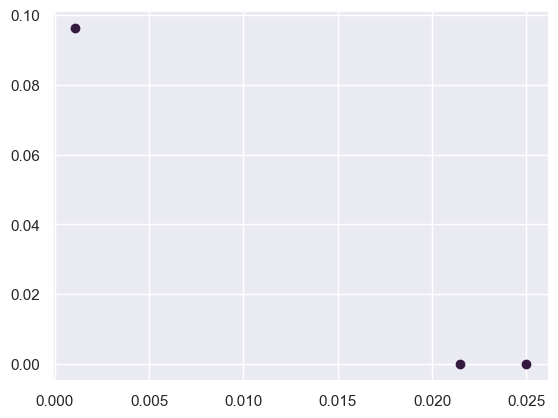

PyObject <matplotlib.collections.PathCollection object at 0x000001B9F0FF5990>

In [8]:
using PyPlot
using Seaborn

Seaborn.set_theme()
Seaborn.set_palette("rocket")

PyPlot.scatter([0.025 0.0215 0.0011], [2.83e-5 0.0001363 0.096249]) 

$$f: \mathbb{R}^3 \rightarrow \mathbb{R}$$

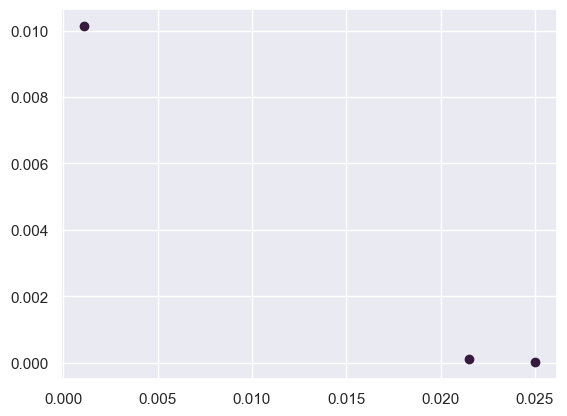

PyObject <matplotlib.collections.PathCollection object at 0x000001B9F1057760>

In [9]:
PyPlot.scatter([0.025 0.0215 0.0011], [2.81e-5 0.0001229 0.0101357])

$$f: \mathbb{R}^4 \rightarrow \mathbb{R}$$

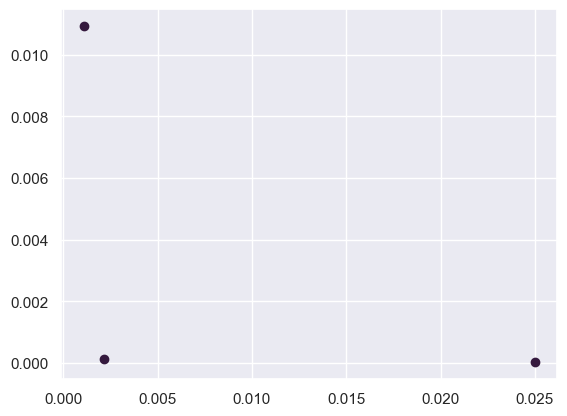

PyObject <matplotlib.collections.PathCollection object at 0x000001B9F101C130>

In [10]:
PyPlot.scatter([0.025 0.00215 0.0011], [2.97e-5 0.0001288 0.0109323])

Nótese que para 4 dimensiones, es increiblemente más rapido calcular para una desviación estandar bastante aceptable

In [ ]:
function riemann(f, nPrism, deltaX)    

[4] Utilizando la definición de valor esperado de una variable aleatoria, muestra (matemáticamente) cómo se puede calcular la integral $$\int_{a}^b f(x) dx$$ (en clase lo hicimos para $a = 0$ y $b = 1$, generaliza eso para cualquier $a$ y $b$).  Finalmente implementa una función que calcule la integral de otra entre 2 valores usando esta idea. 

El valor esperado de una variable aleatoria es
$$<X> = \int_{-\infty}^{\infty} \rho_X (x) dx$$
y si aplicamos una función g a esta variable se obtiene que su valor esperado es
$$<g(X) = Y> = \int_{-\infty}^{\infty} g(x)\rho_X (x) dx$$
Para una variable aleatoria uniforme definida en el intervalo $[a, b]$ esto es igual a
$$=\frac{1}{b - a} \int_{a}^{b} g(x) dx$$
por lo tanto la integral puede verse cómo el promedio multiplicado por la medida del dominio de la función
$$<g(x)>(b - a) = \int_{a}^{b} g(x) dx$$

In [ ]:
inti(f, a, b, n) = sum(f.(rand(n)*(b - a) .+ a))/n

In [ ]:
f(x) = x

In [ ]:
inti(f, 1, 2, 10000000)

[5] Generaliza la función anterior para aplicarlo a integrales múltiples. Prueba con las mismas funciones que usaste en el ejercicio 3. Luego mide el tiempo de cómputo como función de la desviación estándar al menos para dimensión 1 y 4. ¿Qué método es mejor, el de disparo o este? 

In [ ]:
function intt(f, nPrism, n=100000)
    init = []
    vols = []
    summ = 0
    
    for inter in nPrism
        append!(init, inter[1])
        append!(vols, inter[2] - inter[1])
    end    
    
    for k in 1:n
       summ += f(rand(length(nPrism)) .* vols + init)
    end
    
    return summ/n
end

In [ ]:
f(A) = sum(sin.(A))

In [ ]:
f(rand(3))

In [ ]:
intt(f, [(-pi,pi), (-pi,pi), (-pi,pi)])

## Ecuaciones diferenciales parciales

Esta sección es difícil. Hacer los programas te llevará tiempo y correrlos también. Aunque son menos problemas, te llevará probablemente más que el doble de tiempo hacerlos que el resto. Como estos son problemas más difíciles, cada uno vale 1 punto. 

[6] ¿Qué tienes que modificar al caminante aleatorio para resolver la ecuación $\nabla u = c$ donde $c$ es una constante? Haz el código que resuelva este caso. 

R. C. Sadiku, M. N. O., & Garcia, R. C. (n.d.). Monte Carlo floating random walk solution of Poisson’s equation. Proceedings of Southeastcon  ’93. doi:10.1109/secon.1993.465708 

Tomando la notación del artículo aquí $g(x, y) = cte$, además junto con la conmutatividad de las sumas finitas se púede llegar a la siguiente expresión

$$V(x_o, y_o) = \frac{1}{N}\sum^N_i f_b(i) + \frac{c\Delta^2}{4}\sum_{puntosCaminante}$$
si definimos $\Delta = 1$
$$V(x_o, y_o) = \frac{1}{N}\sum^N_i f_b(i) + \frac{c}{4}\sum_{puntosCaminante}$$

In [ ]:
function esValida(i, j, retic)
    retic[i, j] == -1 ? false : true
end

function caminarAlCaminante(i, j)
    n = rand(-1:1, 1)
    m = rand(-1:1, 1)
    
    i += n[1]
    j += m[1]
    
    return i, j
end

function trayectoria(i, j, retic)
    ansatz = true
    I, J = [i], [j]
    
    while ansatz
        i, j = caminarAlCaminante(i, j)
        push!(I, i), push!(J, j)
        ansatz = esValida(i, j, retic)
    end
    
    return I, J
end

function minimo_o_inf(matriz)
    n,m = size(matriz)
    x = Inf
    
    for i in 1:n, j in 1:m  #busca el mínimo mayor o igual a 0. Si todos son negativos, regresa Inf
        if matriz[i,j]<x && matriz[i,j] >= 0 
            x = matriz[i,j]
        end
    end
    
    return x
end

function infimo_o0(matriz) # revisa, entre los valores de la retícula que son mayores o iguales a 0, cual es el menor valor
    x = minimo_o_inf(matriz)
    
    if x ≠ Inf 
        return x 
    else
        return 
        0 # si todos los valores en la matriz son negativos, regresa 0. 
    end
end

function imprimeValores(i,j,numero_de_caminantes, contador, pasos)
    if mod(contador, pasos) == 0
        println("revisando vertice ($i ,$j)")
        println("Caminantes máximos = $(maximum(numero_de_caminantes))")
        println("Caminantes mínimos = $(infimo_o0(numero_de_caminantes))")
        println(" ")
        flush(stdout)
    end
    
end

function lilWalker(i, j, retic, f, solucion, numeroCaminantes)
    ansatz = esValida(i, j, retic)
    z = []
    
    if ansatz
        a, b = trayectoria(i, j, retic)
        z = copy(a)
        s = f(a[end], b[end])
        
        for l in 1:length(a) - 1
            solucion[a[l], b[l]] += s
            numeroCaminantes[a[l], b[l]] += 1
        end
    end
    
    return solucion, numeroCaminantes, length(z)
end

function poissonSolver(retic, f, c, n) #c es la constante de la ecuación de Poisson    
    contador = 0
    n1, n2 = size(retic)
    solucion = zeros(n1,n2)
    numeroCaminantes = [retic[i,j]<0 ? -1 : 0 for i in 1:n1, j in 1:n2] # asegura que la retícula sean sólo 0's y 1's
    puntos = 0
    
    while infimo_o0(numeroCaminantes)<n
        for i in 1:n1, j in 1:n2
            contador += 1
            imprimeValores(i, j, numeroCaminantes, contador, 5000) #imprime los valores cada 5000 pasos para saber qué tan avanzado va el cálculo
            solucion, numeroCaminantes, puntos = lilWalker(i, j, retic, f, solucion, numeroCaminantes)
            if infimo_o0(numeroCaminantes)>n
                break
            end
        end
    end
    
    return solucion .+ puntos*(c/4), numeroCaminantes
end

In [ ]:
using Images
placa = load("trian.png")

In [ ]:
using Plots

In [ ]:
a, b = size(placa)
retic = [placa[a+1-i,j] == placa[1,1] ? -1 : 0 for i in 1:a, j in 1:b]; 
heatmap(retic)

In [ ]:
f(x, y) = 1/(x^2 + y^2 + 1)
poissonSolver(retic, f, 3000, 10)  

[7] ¿Qué modelo de caminante aleatorio se puede usar para resolver la ecuación de onda? Una vez que hayas encontrado el modelo de caminante aleatorio adecuado, resuelve la ecuación de onda en una placa cuadrada donde los bordes están fijos (el centro es el que tiene la perturvación). Con eso obtendrás las figuras de Chlandi (es decir, la onda estacionaria). Prueba el dejar un punto fijo dentro de la ¿se forma alguna figura? ¿Se puede fijar un punto en cualquier lugar de la placa y aún obtener las figuras de Chlandi? 

También resuélvelo para alguna otra placa que quieras ¿Para cualquier forma de placa se obtiene un estado estacionario? 

Nota: Recuerda que para resolver este caso, debes tener las condiciones iniciales (todos los valores de la placa al tiempo 0 y todas las velocidades (o valores de la placa al tiempo 1) iniciales), además de las condiciones a la frontera (cuánto vale $u$ en la frontera en todo momento). Además, como estamos interesados en una oscilación constante, se debe tener una función del valor de $u$ en un punto que sea del tipo $A cos(\omega t)$.   

In [ ]:
A = [3,3,3]

In [ ]:
E = copy(A)

**Nota**: En total esta primera parte vale 3 puntos. Las siguientes 2 partes valdrán 4 y 4 puntos porque serán un poquito más difíciles que esta. Tendrán poco más de un mes para hacer toda la tarea. El martes de la próxima semana subo la siguiente parte y doy la clase sobre el algoritmo de Metropolis y algunas variaciones de este. 

[8] **Capacidad calorífica, suceptibilidad magnética e histéresis en el modelo de Ising:** Haremos este problema en varios pasos. 

* Obtén el número de pasos de Monte-Carlo para alcanzar el equilibrio. Para esto grafica para 3 valores de la temperatura $k_B T = 0.1, 2.2$ y $4$ la energía $H$ y la magnetización $m$ contra el tiempo (número de pasos) en el modelo de Ising para $J = 1$, $B = 0.01$ y $L = 50$. Asegúrate de normalizar la energía, dividiéndola entre la máxima energía posible del sistema, de forma que puedas graficar $H$ y $m$ en una misma gráfica y que más o menos estén en la misma escala (entre 0 y 1). No olvides ponerle el valor absoluto a $m$. Para elegir la cantidad de pasos adecuada que debe tener tu sistema, asegúrate que en los 3 casos, la $H$ y $m$ lleguen a valores similares y más o menos estables (salvo fluctuaciones). El número de pasos donde eso suceda + 10\% será el número de pasos adecuado. **Nota: para graficar tendrás muchísimos datos, grafica sólo 1 de cada mil, sino Plots no podrá con la gráfica y trabarás tu computadora.** 

* Con ese número de pasos haz 100 simulaciones donde guardes 100 de los últimos $10^4$ datos (o sea 1 de cada 100 pasos de Monte-Carlo) para 100 valores de la temperatura (con $k_B T$ entre 0 y 4) comenzando siempre desde un arreglo aleatorio, de forma que tengas para cada valor de la temperatura $10^4$ datos de la energía y de la magnetización. Con esos datos obtén $\langle m \rangle$, $\langle E \rangle$, $\langle m^2 \rangle$, $\langle E^2 \rangle$ y con ello obtén $C_B$ y $\chi_B$. Guarda tus datos para hacer las gráficas de $\langle m \rangle$ y $\langle E \rangle$. 

* Repite el inciso anterior, esta vez sólo haciendo un promedio de los últimos $10^3$ pasos (sin hacer ya 100 simulaciones) y compara lo obtenido para $\langle m \rangle$ y $\langle E \rangle$ usando lo del ejercicio anterior. Notarás que se obtiene casi lo mismo (no en cambio con $C_B$ y $\chi_B$. 

* Repite el inciso anterior (sólo midiendo $\langle m \rangle$ y $\langle E \rangle$) pero esta vez el estado inicial en cada temperatura será el estado final de la temperatura anterior, comenzando por un sistema completamente ordenado para $k_B T = 0$. Después haz la gráfica en sentido contrario, es decir, comenzando con un sistema completamente desordenado a $k_B T = 4$ y reduciendo de $0.04$ en $0.04$ la temperatura. Grafica ambos casos (tanto $\langle m \rangle$ y $\langle E \rangle$). 

* Repite el inciso anterior para un cuarto del número de pasos y observa qué sucede. (deberías ver que el ciclo de histéresis se incrementa). 

El hamiltoneano del sistema será
$$H = -\sum_{<i,j>}\sigma_i\sigma_j - 0.01\sum_j^{50}\sigma_j$$

In [1]:
function initialState(L)
    return rand([-1, 1], L, L)
end

initialState (generic function with 1 method)

In [2]:
function randomSite(L)
    return rand(1:L), rand(1:L)
end

randomSite (generic function with 1 method)

In [3]:
function stateChange(L, state)
    stat1 = copy(state)
    ala = randomSite(L)
    
    stat1[ala[1], ala[2]] *= -1
    return stat1
end

stateChange (generic function with 1 method)

In [4]:
function neighbors(n, m, initialState)
    A = []
    L = size(initialState)[1]
    
    if n == 1 && m == 1
        append!(A, [initialState[L, m], initialState[n, L], initialState[n + 1, m], initialState[n, m+1]])
    elseif n == L && m == 1
        append!(A, [initialState[1, m], initialState[n, L], initialState[n - 1, m], initialState[n, m+1]])
    elseif n == 1 && m == L
        append!(A, [initialState[L, m], initialState[n + 1, L], initialState[n, m - 1], initialState[n, 1]])
    elseif n == L && m == L
        append!(A, [initialState[1, m], initialState[n - 1, m], initialState[n, 1], initialState[n, m-1]])
    elseif n == 1
        append!(A, [initialState[L, m], initialState[n + 1, m], initialState[n, m-1], initialState[n, m+1]])
    elseif n == L
        append!(A, [initialState[1, m], initialState[n - 1, m], initialState[n, m-1], initialState[n, m+1]])
    elseif m == 1
        append!(A, [initialState[n+1, m], initialState[n - 1, m], initialState[n, L], initialState[n, m+1]])
    elseif m == L
        append!(A, [initialState[n+1, m], initialState[n - 1, m], initialState[n, 1], initialState[n, m-1]])
    else
        append!(A, [initialState[n-1, m], initialState[n+1, m], initialState[n, m-1], initialState[n, m+1]])
    end
    
    return A
end

neighbors (generic function with 1 method)

In [5]:
import Base.*

function *(x::Number, )

LoadError: syntax: incomplete: premature end of input

In [5]:
function hamiltonian(state)
    energia = 0
    summ = 0
    l = size(state)[1]
    
    for j in 1:l, k in 1:l
        summ -= sum(state[j, k] * neighbors(j, k, state))
    end
    
    summ -= 0.01*sum(state)
    
    return summ
end

hamiltonian (generic function with 1 method)

In [6]:
function boltzProb(initState, prblState, KT)
    deltaE = hamiltonian(prblState) - hamiltonian(initState)
    
    if deltaE == 0 && KT == 0
        return 0
    else 
        return min(1, exp(-deltaE/KT))
    end
end

boltzProb (generic function with 1 method)

In [7]:
function metropolisIsing(n, KT, L = 40)
     state = initialState(L)
     states = []
    
     for k in 1:n
        stChn = stateChange(L, state)
        prob = boltzProb(state, stChn, KT)
        r = rand(1)[1]

        if r < prob
            state = stChn
        end

    end
    
    return state
end

metropolisIsing (generic function with 2 methods)

In [ ]:
datos0_1m = []
datos2_2m = []
datos4m = []

datos0_1H = []
datos2_2H = []
datos4H = []

maxHamiltonian = hamiltonian(ones(40, 40))
for k in 80000:3000:100000
    state0_1 = metropolisIsing(k, 0.1)
    state2_2 = metropolisIsing(k, 2.2)
    state4 = metropolisIsing(k, 4)
    
    append!(datos0_1m, abs(sum(state0_1)))
    append!(datos2_2m, abs(sum(state2_2)))
    append!(datos4m, abs(sum(state4)))

    append!(datos0_1H, hamiltonian(state0_1)/maxHamiltonian)
    append!(datos2_2H, hamiltonian(state2_2)/maxHamiltonian)
    append!(datos4H, hamiltonian(state4)/maxHamiltonian)
end


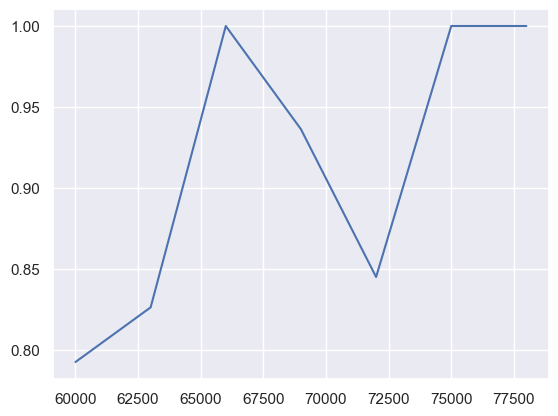

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001B9F125BE50>

In [28]:
using PyPlot
using Seaborn

Seaborn.set_theme()

PyPlot.plot(60000:3000:80000, datos0_1m ./ 1600)

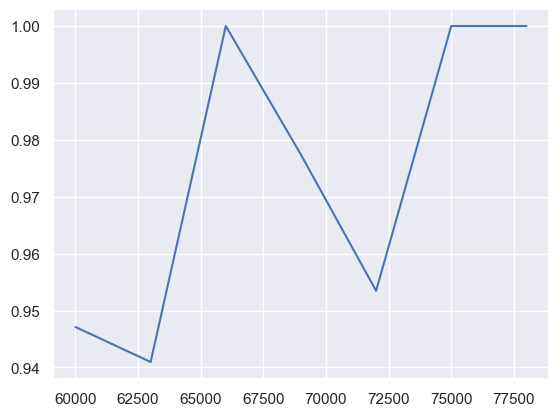

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001B9FC399300>

In [30]:
PyPlot.plot(60000:3000:80000, datos0_1H)

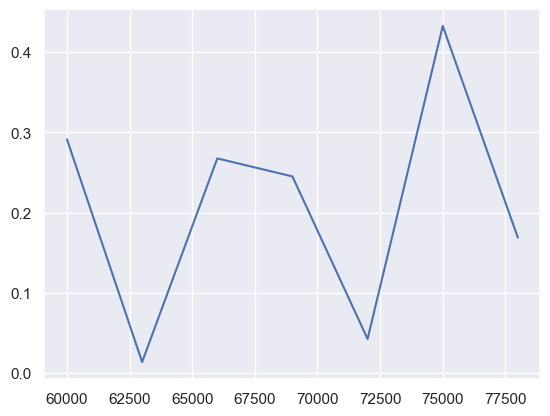

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001BA10629D80>

In [33]:
PyPlot.plot(60000:3000:80000, datos2_2m ./ 1600)

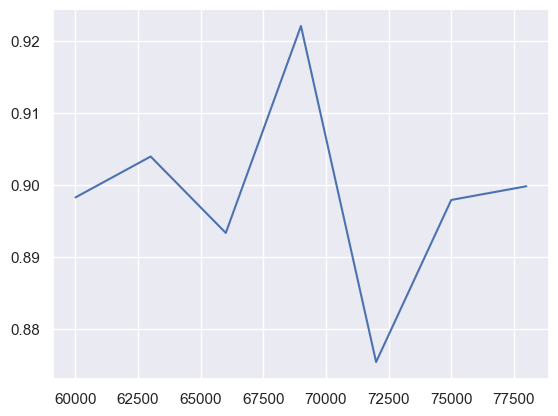

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001BA106B8190>

In [35]:
PyPlot.plot(60000:3000:80000, datos2_2H)

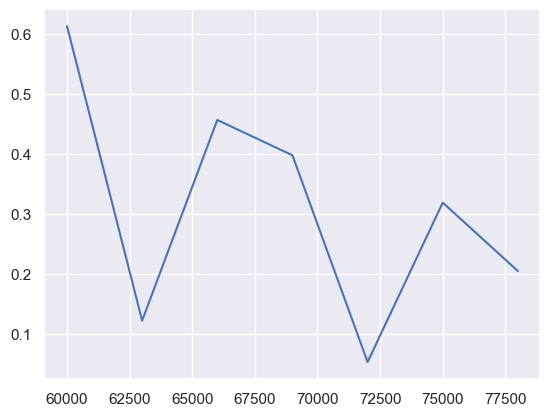

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001BA1084DCF0>

In [37]:
PyPlot.plot(60000:3000:80000, datos4m ./ 1600)

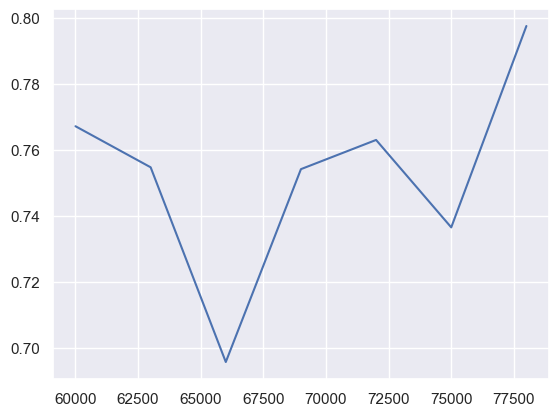

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001BA108DCAF0>

In [38]:
PyPlot.plot(60000:3000:80000, datos4H)

In [8]:
function metropolisConDatos(n, KT, L = 40)
     state = initialState(L)
     States = []
     DataM = []
     DataH = []
     maxHamiltonian = hamiltonian(ones(40, 40))
    
     for k in 1:n
        stChn = stateChange(L, state)
        prob = boltzProb(state, stChn, KT)
        r = rand(1)[1]

        if r < prob
            state = stChn
        end
        
        if k > n - 10000 && k%100 == 0
            append!(DataM, abs(sum(state)))
            append!(DataH, hamiltonian(state)/maxHamiltonian)
        end
    end
    
    return DataM, DataH
end

metropolisConDatos (generic function with 2 methods)

In [ ]:
DatosM = []
DatosH = []
print("ele")

for β in 0.1:0.25:4
    println(β)
    Data = [metropolisConDatos(75000, β) for k in 1:2] 
    DATOS = (sum([data[1] for data in Data])/2, sum([data[2] for data in Data])/2)
    
    push!(DatosM, DATOS[1])
    push!(DatosH, DATOS[2])
end

In [12]:
metropolisConDatos(75000, 3) 


LoadError: UndefVarError: initialState not defined

a grosso modo en 40k a 50 k se termaliza

[9] **Modelo XY**: El modelo XY es como el modelo de Ising, salvo que los espines pueden apuntar en cualquier dirección y no sólo en 2 direcciones. Por lo tanto, para calcular la energía del sistema se requiere calcular el producto punto (equivalentemente el ángulo) entre el campo magnético y el espín y también el ángulo entre dos espines vecinos. 

$$ H(\sigma) = - \sum_{i\neq j} J_{ij}\; \vec{\sigma}_i\cdot\vec{\sigma}_j -\sum_j \mathbf{B}_j\cdot \vec{\sigma}_j$$

Considera que $J$ y $B$ son constantes.

Este es uno de esos modelos que NO debería presentar una transición de fase en el sentido clásico según el teorema de Mermin-Wagner, pues es un sistema continuo (la posición es discreta, pero la orientación es continua). 

* Repite el primer inciso del problema anterior usando este modelo, pero esta vez para $k_B T = 0.1, 0.9$ y $2$. Con eso obtén el número de pasos de Monte-Carlo para que el sistema "termalice". 

* Mide $\langle m \rangle$ y $\langle E \rangle$ (usando el promedio de los último $10^3$ pasos en un solo sistema) y reduciendo la temperatura desde un estado completamente desordenado (comienza en $k_B T = 2$), para variaciones de $\Delta k_B T = 0.01$ lentas (2 veces el número de pasos de Monte-Carlo que encontraste en el iniciso 1). ¿Si observas una transición de fase (o algo similar), a qué temperatura la observas (aproximadamente)? 

* Repite ahora el experimento con variaciones rápidas de la temeratura (1, 1/2, 1/3, 1/4 y 1/8 veces el número de pasos de Monte-Carlo que usaste en el inciso anterior). Haz una gráfica del sistema que obtienes en cada caso cuando llegas a temperatura 0. Para esto dibuja una red de $50\times 50$ donde en cada nodo pongas una flechita que represente al espín (apuntando en la dirección que le corresponde). ¿Se ordenan siempre los espines en alguna dirección? 

Nota: Este es el segundo problema que trataron Kosterliz y Thoules, el primero fue el de discos duros, el segundo fue este. Por ambos se les dió el premio Nobel de Física en 2016. Además, en 2021 Parisi recibió el premio Nobel de Física por 2 razones, por estudiar sistemas complejos en general y por sus trabajos sobre vidrios de espín, que son las estructuras que deberían encontrar para enfriamientos rápidos en este modelo! 

In [1]:
k = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

[10] **Esferas suaves**: Utiliza el potencial de Lennard-Jones (LJ) para simular partículas suaves. Es decir, partículas que a partir de una cierta distancia tienen un potencial $0$, pero si la distancia es menor que ese radio, su potencial es el de LJ. Para no tener problemas de continuidad, elige el radio igual al radio donde el potencial de LJ se vuelve 0. 

**Nota:** Este problema se trata sólo de repetir lo mismo que hicimos para esferas duras, pero para esferas suaves. No se pide ninguna medición, sólo hacer la animación de cómo van creciendo y acomodándose las esferas. 

In [5]:
if 100 in k
    print(5)
end